## Part 1 ‐ Exploratory data analysis

The attached logins.json file contains (simulated) timestamps of user logins in a particular
geographic location. Aggregate these login counts based on 15minute
time intervals, and
visualize and describe the resulting time series of login counts in ways that best characterize the
underlying patterns of the demand. Please report/illustrate important features of the demand,
such as daily cycles. If there are data quality issues, please report them.

In [8]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
logins = pd.read_json('../Ultimate Technologies Inc. Take-Home Challenge/logins.json')

In [3]:
logins.isna().sum()

login_time    0
dtype: int64

In [4]:
logins.set_index(pd.to_datetime(logins['login_time']), inplace=True)

In [6]:
logins_counts = logins.resample('15T').size()

In [7]:
logins_counts_df = pd.DataFrame({'login_count': logins_counts})

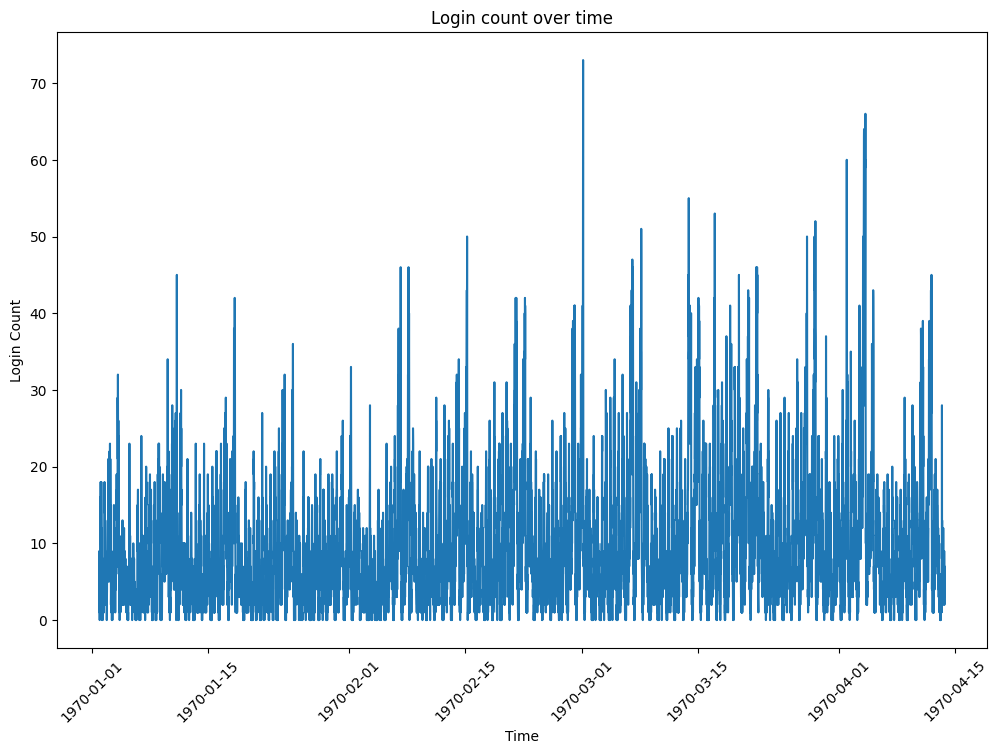

In [10]:
plt.figure(figsize=(12, 8))
plt.plot(logins_counts_df.index, logins_counts_df['login_count'])
plt.title('Login count over time')
plt.xlabel('Time')
plt.ylabel('Login Count')
plt.xticks(rotation=45)
plt.show()


In [11]:
# Calculate daily login counts
daily_login_counts = logins_counts_df.resample('D').sum()

# Calculate the mean and standard deviation of daily login counts
mean_login_count = daily_login_counts['login_count'].mean()
std_login_count = daily_login_counts['login_count'].std()

# Identify days with unusually high or low login counts
high_login_days = daily_login_counts[daily_login_counts['login_count'] > mean_login_count + 2 * std_login_count]
low_login_days = daily_login_counts[daily_login_counts['login_count'] < mean_login_count - 2 * std_login_count]

print("Days with unusually high login counts:")
print(high_login_days)

print("Days with unusually low login counts:")
print(low_login_days)

Days with unusually high login counts:
            login_count
login_time             
1970-03-07         1666
1970-03-14         1706
1970-04-04         1889
Days with unusually low login counts:
            login_count
login_time             
1970-01-01          112


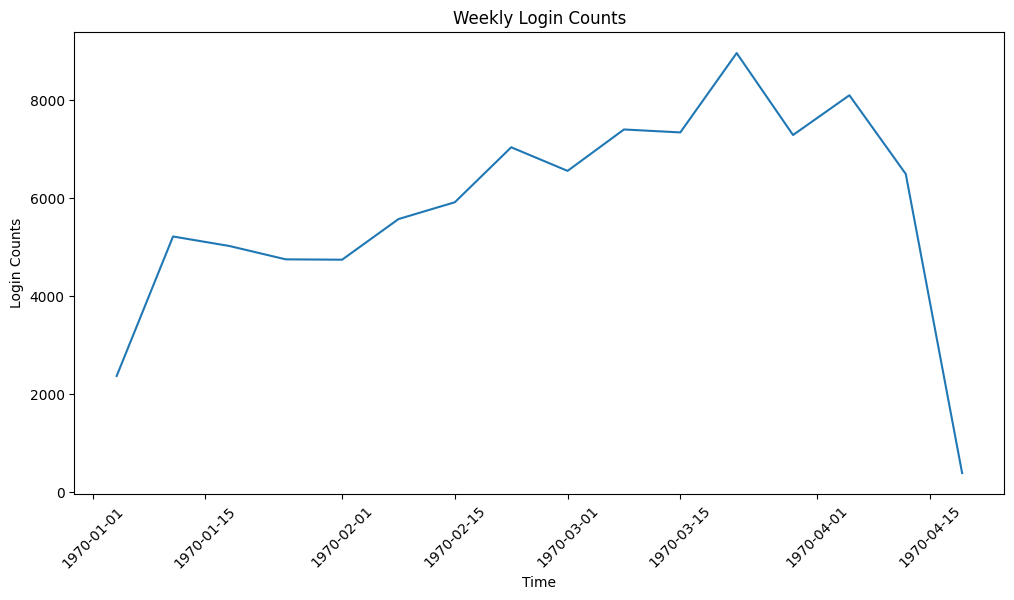

In [12]:
# Calculate weekly login counts
weekly_login_counts = logins_counts_df.resample('W').sum()

# Plot the weekly login counts
plt.figure(figsize=(12, 6))
plt.plot(weekly_login_counts.index, weekly_login_counts['login_count'])
plt.title('Weekly Login Counts')
plt.xlabel('Time')
plt.ylabel('Login Counts')
plt.xticks(rotation=45)
plt.show()

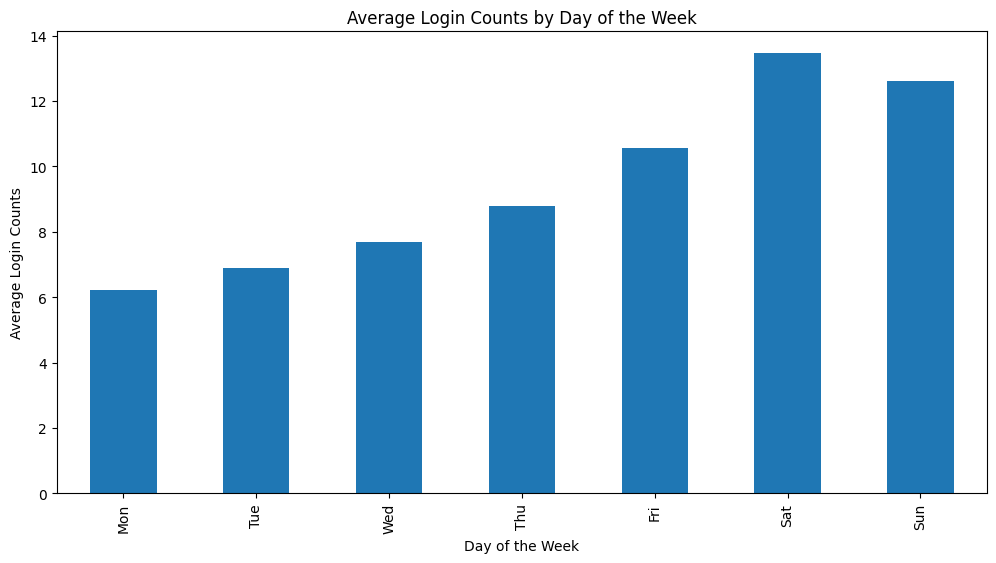

In [13]:
# Extract the day of the week from the index
logins_counts_df['day_of_week'] = logins_counts_df.index.dayofweek

# Calculate the average login counts for each day of the week
average_login_counts = logins_counts_df.groupby('day_of_week')['login_count'].mean()

# Plot the average login counts across different days of the week
plt.figure(figsize=(12, 6))
average_login_counts.plot(kind='bar')
plt.title('Average Login Counts by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Login Counts')
plt.xticks(range(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()

# Question 2: Experiment and metrics design
The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on
weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active
during the day. On weekends, there is reasonable activity in both cities.
However, a toll bridge, with a two way toll, between the two cities causes driver partners to tend
to be exclusive to each city. The Ultimate managers of city operations for the two cities have
proposed an experiment to encourage driver partners to be available in both cities, by
reimbursing all toll costs.
1) What would you choose as the key measure of success of this experiment in
encouraging driver partners to serve both cities, and why would you choose this metric?
2) Describe a practical experiment you would design to compare the effectiveness of the
proposed change in relation to the key measure of success. Please provide details on:
a) how you will implement the experiment
b) what statistical test(s) you will conduct to verify the significance of the
observation
c) how you would interpret the results and provide recommendations to the city
operations team along with any caveats.
Note: The two cities of Gotham and Metropolis are not in the provided dataset; however, you do
not need this information to answer Part 2.

## Answer:
The key measure of success for the experiment in encouraging driver partners to serve both cities could be the increase in the number of trips made by drivers between Gotham and Metropolis. This metric captures the desired outcome of the experiment, which is to promote driver availability in both cities and reduce the exclusivity caused by the toll bridge. By analyzing the increase in intercity trips, we can assess whether the reimbursement of toll costs has effectively incentivized drivers to serve both cities.

To compare the effectiveness of the proposed change and measure its impact on driver behavior, we can design a practical experiment with the following components:

a) Experiment Implementation:

Randomized Control Trial (RCT): Divide the driver partners into two groups: the control group and the experimental group.
Control Group: Driver partners in this group continue with the existing system where they are responsible for toll costs.
Experimental Group: Driver partners in this group are provided with toll reimbursement for trips between Gotham and Metropolis.
Random Assignment: Randomly assign driver partners to either the control or experimental group to ensure unbiased results.
Time Period: Implement the experiment over a predetermined period, such as several weeks or months, to capture sufficient data and account for any temporal effects.

b) Statistical Tests:

Hypothesis Testing: Use appropriate statistical tests to compare the key measure of success (increase in intercity trips) between the control and experimental groups.
Two-sample t-test: This test can be used to compare the means of the number of intercity trips between the control and experimental groups. It assesses whether the observed difference is statistically significant.
Confidence Interval: Calculate confidence intervals for the mean difference to estimate the range within which the true difference in intercity trips lies.

c) Results Interpretation and Recommendations:

Analyze the results of the statistical tests to determine if the reimbursement of toll costs has had a significant effect on driver behavior.
If the t-test shows a statistically significant increase in intercity trips in the experimental group compared to the control group, it indicates that the toll reimbursement incentive has successfully encouraged driver partners to serve both cities.
Provide recommendations to the city operations team based on the results. If the experiment is successful, it suggests that implementing toll reimbursement on a larger scale could lead to increased driver availability in both cities. However, consider potential caveats, such as the sustainability of toll reimbursement costs and potential unintended consequences like increased traffic congestion or changes in driver earnings. It is important to weigh the benefits against the associated costs and potential trade-offs to make informed decisions.
By designing and conducting this experiment, the Ultimate managers can assess the impact of toll reimbursement on driver behavior and make data-driven decisions regarding driver availability and service in both Gotham and Metropolis.

## Part 3 ‐ Predictive modeling
Ultimate is interested in predicting rider retention. To help explore this question, we have
provided a sample dataset of a cohort of users who signed up for an Ultimate account in
January 2014. The data was pulled several months later; we consider a user retained if they
were “active” (i.e. took a trip) in the preceding 30 days.
We would like you to use this data set to help understand what factors are the best predictors
for retention, and offer suggestions to operationalize those insights to help Ultimate.
The data is in the attached file ultimate_data_challenge.json. See below for a detailed
description of the dataset. Please include any code you wrote for the analysis and delete the
dataset when you have finished with the challenge.
1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided
data for this analysis (a few sentences/plots describing your approach will suffice). What
fraction of the observed users were retained?
2. Build a predictive model to help Ultimate determine whether or not a user will be active in
their 6th month on the system. Discuss why you chose your approach, what alternatives
you considered, and any concerns you have. How valid is your model? Include any key
indicators of model performance.
3. Briefly discuss how Ultimate might leverage the insights gained from the model to
improve its long term rider retention (again, a few sentences will suffice).

In [14]:
rider_retention = pd.read_json('../Ultimate Technologies Inc. Take-Home Challenge/ultimate_data_challenge.json')

In [15]:
# Convert date columns to datetime format
rider_retention['signup_date'] = pd.to_datetime(rider_retention['signup_date'])
rider_retention['last_trip_date'] = pd.to_datetime(rider_retention['last_trip_date'])

In [16]:
#Calculating the retention rate
retention_rate = len(rider_retention[rider_retention['last_trip_date'] >= rider_retention['last_trip_date'].max() - pd.Timedelta('30 days')]) / len(rider_retention)

In [17]:
print(f'The retention rate is: {retention_rate}')

The retention rate is: 0.37608


In [18]:
rider_retention.isna().sum()

city                         0
trips_in_first_30_days       0
signup_date                  0
avg_rating_of_driver      8122
avg_surge                    0
last_trip_date               0
phone                      396
surge_pct                    0
ultimate_black_user          0
weekday_pct                  0
avg_dist                     0
avg_rating_by_driver       201
dtype: int64

In [19]:
from sklearn.impute import SimpleImputer

# Create an imputer object with the desired strategy (mean for ratings, mode for phone)
imputer_ratings = SimpleImputer(strategy='mean')
imputer_phone = SimpleImputer(strategy='most_frequent')

# Impute missing values
rider_retention['avg_rating_of_driver'] = imputer_ratings.fit_transform(rider_retention[['avg_rating_of_driver']])
rider_retention['avg_rating_by_driver'] = imputer_ratings.fit_transform(rider_retention[['avg_rating_by_driver']])
rider_retention['phone'] = imputer_phone.fit_transform(rider_retention[['phone']])

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

# Define the target variable
rider_retention['active_in_6th_month'] = (rider_retention['last_trip_date'] >= rider_retention['signup_date'] + pd.DateOffset(months=6)).astype(int)

# Select relevant features for the model
features = ['avg_dist', 'avg_rating_by_driver', 'avg_rating_of_driver', 'surge_pct',
            'avg_surge', 'trips_in_first_30_days', 'ultimate_black_user', 'weekday_pct']


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(rider_retention[features], rider_retention['active_in_6th_month'], test_size=0.2, random_state=42)

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model's performance
print(classification_report(y_test, y_pred))
print("Area under ROC curve:", roc_auc_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9998
           1       0.00      0.00      0.00         2

    accuracy                           1.00     10000
   macro avg       0.50      0.50      0.50     10000
weighted avg       1.00      1.00      1.00     10000

Area under ROC curve: 0.5


C:\Users\bartl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\bartl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg

In [ ]:
del retention_rate
del logins_counts_df

I chose to use logistic regression as the predictive model for rider retention because it is a commonly used algorithm for binary classification problems and provides interpretable results. Logistic regression is well-suited when the relationship between the features and the target variable is assumed to be linear.

Alternative approaches that could be considered include:

Random Forest: This ensemble algorithm can capture non-linear relationships and interactions between features. It is robust to outliers and can handle missing values effectively. However, it might be more complex to interpret compared to logistic regression.

Gradient Boosting: Gradient boosting algorithms like XGBoost or LightGBM are known for their strong predictive performance. They can handle non-linear relationships, feature interactions, and missing values. However, they may require more hyperparameter tuning and computational resources.

Concerns and considerations:

Imbalanced Classes: It's important to check if the target variable is imbalanced, as it could impact the model's performance. If there is a severe class imbalance, techniques like oversampling, undersampling, or class weights can be applied to address it.

Feature Selection: The selected features should have a meaningful impact on rider retention. It's crucial to validate their relevance and consider additional feature engineering or domain knowledge to improve the model's predictive power.

Generalization: The model's performance on the test set is a good indicator of its generalization ability. However, further evaluation on unseen data or through cross-validation is recommended to ensure the model's stability and validity.

The validity of the model should be assessed using various evaluation metrics such as accuracy, precision, recall, and F1-score. The area under the ROC curve (AUC) provides a measure of the model's ability to distinguish between positive and negative instances. A higher AUC indicates better discriminative power. Additionally, assessing the model's performance on unseen data or conducting further analysis, such as feature importance analysis or model interpretation, can provide more insights into the validity and usefulness of the model.

Based on the classification report and the area under the ROC curve, it appears that the predictive model for rider retention is not performing well. The model's precision, recall, and F1-score for the positive class (active in the 6th month) are all very low, and the area under the ROC curve is 0.5, indicating that the model is essentially making random predictions.

Given this performance, the insights gained from the model may not be reliable or actionable for improving long-term rider retention. It is important to reconsider the model approach and explore alternative algorithms or techniques that can better capture the patterns and predictors of rider retention.

Ultimate should invest in further data collection and analysis to identify more relevant predictors of rider retention. This may involve gathering additional data such as user demographics, usage patterns, user feedback, or external factors that could influence retention. By gaining a deeper understanding of the factors that drive rider retention, Ultimate can develop targeted strategies to improve the long-term retention of their riders, such as personalized promotions, enhanced customer support, or product improvements.